In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from common import get_all_data

player_data, rank_match_data, rank_player_match_data, swift_match_data, swift_player_match_data = get_all_data()

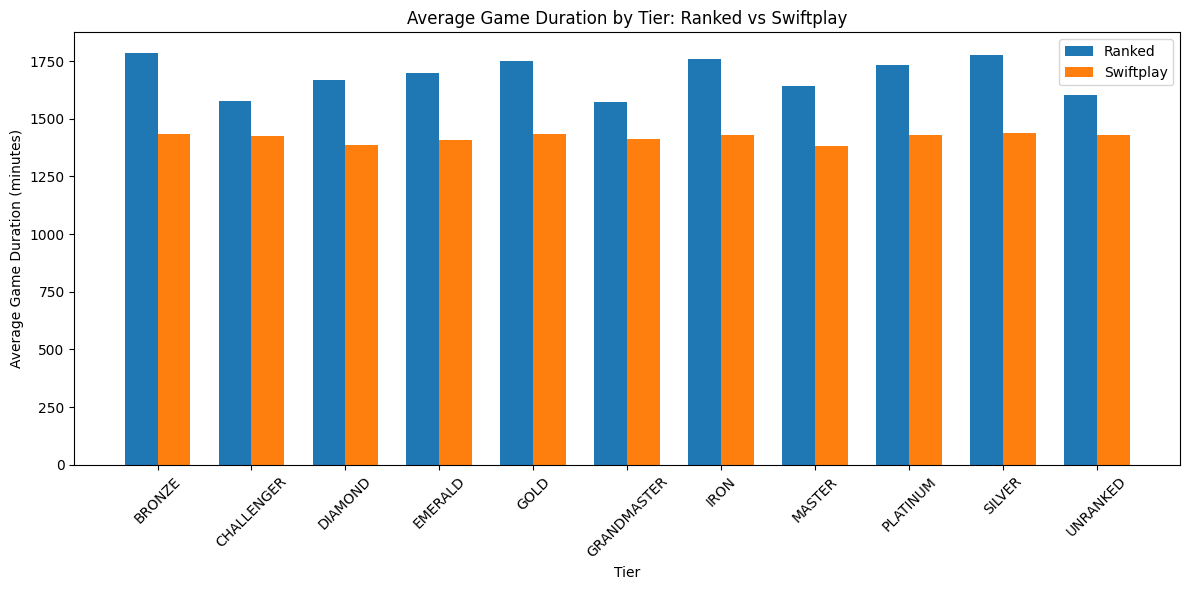

In [14]:
# Swiftplay duration vs Ranked duration

# Merge Ranked datasets
ranked_merged = pd.merge(rank_player_match_data, rank_match_data, on="matchId")
ranked_duration = ranked_merged.groupby("tier")["gameDuration"].mean().reset_index()
ranked_duration = ranked_duration.sort_values("tier")

# Merge Swiftplay datasets
swift_merged = pd.merge(swift_player_match_data, swift_match_data, on="matchId")
swift_duration = swift_merged.groupby("tier")["gameDuration"].mean().reset_index()
swift_duration = swift_duration.sort_values("tier")

# Merge both on tier
combined = pd.merge(ranked_duration, swift_duration, on="tier", suffixes=("_Ranked", "_Swift"))

# Plotting side-by-side bar chart
x = np.arange(len(combined["tier"]))  # label locations
width = 0.35  # width of the bars

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, combined["gameDuration_Ranked"], width, label="Ranked")
plt.bar(x + width/2, combined["gameDuration_Swift"], width, label="Swiftplay")

plt.xlabel("Tier")
plt.ylabel("Average Game Duration (minutes)")
plt.title("Average Game Duration by Tier: Ranked vs Swiftplay")
plt.xticks(x, combined["tier"], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Ranked - Early Surrender: 2.25%
Ranked - Regular Surrender: 26.38%
Swiftplay - Early Surrender: 3.63%
Swiftplay - Regular Surrender: 39.77%


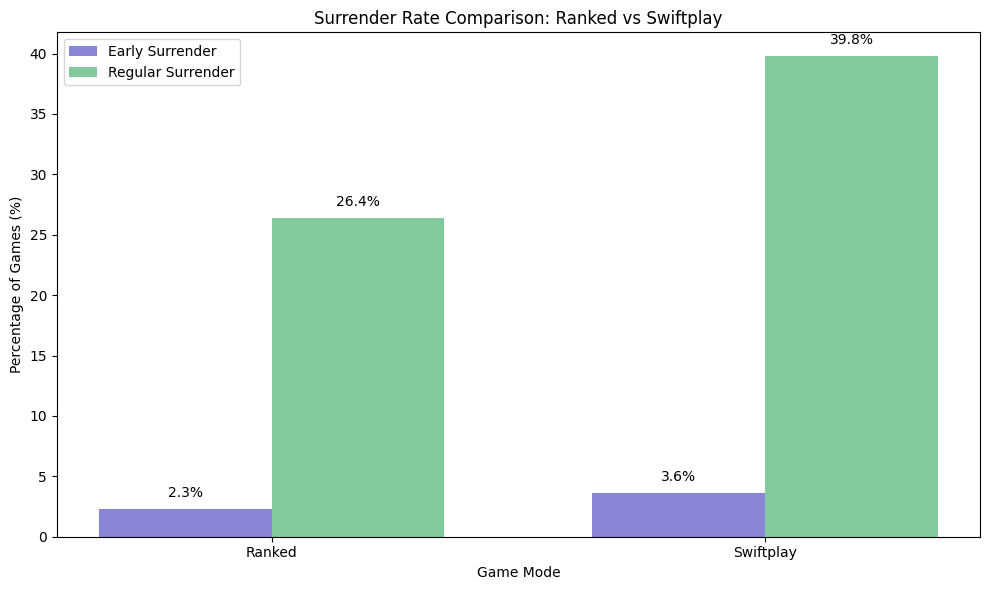

In [ ]:
def get_surrender_percentage(groupby_obj):
    # count the occurrences of each boolean value
    counts = groupby_obj.size()
    
    # if true isn't in the index, that means there are no surrenders
    if True not in counts.index:
        return 0
    
    # calculate percentage of true values
    total = counts.sum()
    true_count = counts.get(True, 0)
    percentage = (true_count / total) * 100
    
    return percentage

# In all games, the percentage of gameEnded InEarlySurrender, and gameEndedInSurrender
# compare rate of games ended in early surrender and games ended in surrender in ranked with 
# games ended in early surrender and games ended in surrender in swiftplay

swiftplay_early_surrender = swift_match_data.groupby("gameEndedInEarlySurrender")
swiftplay_surrender = swift_match_data.groupby("gameEndedInSurrender")
ranked_early_surrender = rank_match_data.groupby("gameEndedInEarlySurrender")
ranked_surrender = rank_match_data.groupby("gameEndedInSurrender")

swiftplay_early_pct = get_surrender_percentage(swiftplay_early_surrender)
swiftplay_regular_pct = get_surrender_percentage(swiftplay_surrender)
ranked_early_pct = get_surrender_percentage(ranked_early_surrender)
ranked_regular_pct = get_surrender_percentage(ranked_surrender)

# print the calculated percentages
print(f"Ranked - Early Surrender: {ranked_early_pct:.2f}%")
print(f"Ranked - Regular Surrender: {ranked_regular_pct:.2f}%")
print(f"Swiftplay - Early Surrender: {swiftplay_early_pct:.2f}%")
print(f"Swiftplay - Regular Surrender: {swiftplay_regular_pct:.2f}%")

# create a df for plotting
data = {
    'Game Mode': ['Ranked', 'Ranked', 'Swiftplay', 'Swiftplay'],
    'Surrender Type': ['Early Surrender', 'Regular Surrender', 'Early Surrender', 'Regular Surrender'],
    'Percentage': [ranked_early_pct, ranked_regular_pct, swiftplay_early_pct, swiftplay_regular_pct]
}
plot_df = pd.DataFrame(data)

# create grouped bar chart
plt.figure(figsize=(10, 6))

# prepare data for grouped bar chart
x = np.array([0, 1])  # positions for ranked and swiftplay
width = 0.35

# create bars
plt.bar(x - width/2, [ranked_early_pct, swiftplay_early_pct], width, 
        label='Early Surrender', color='#8884d8')
plt.bar(x + width/2, [ranked_regular_pct, swiftplay_regular_pct], width,
        label='Regular Surrender', color='#82ca9d')

# add labels and title
plt.xlabel('Game Mode')
plt.ylabel('Percentage of Games (%)')
plt.title('Surrender Rate Comparison: Ranked vs Swiftplay')
plt.xticks(x, ['Ranked', 'Swiftplay'])
plt.legend()

# add percentage values on top of bars
plt.text(x[0] - width/2, ranked_early_pct + 1, f'{ranked_early_pct:.1f}%', ha='center')
plt.text(x[0] + width/2, ranked_regular_pct + 1, f'{ranked_regular_pct:.1f}%', ha='center')
plt.text(x[1] - width/2, swiftplay_early_pct + 1, f'{swiftplay_early_pct:.1f}%', ha='center')
plt.text(x[1] + width/2, swiftplay_regular_pct + 1, f'{swiftplay_regular_pct:.1f}%', ha='center')

plt.tight_layout()
# plt.savefig('surrender_comparison.png')
plt.show()

# out of those who surrender, what rank are they?

In [16]:
# Average amount of time spent dead; Average amount of time spent dead by rank(??)

